In [1]:
import numpy as np
from sklearn.model_selection import train_test_split 
import keras 
import tensorflow as tf
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
sample_size=100000 #Number of labelled data
test_size=0.2    #will be used in train test split of the total data set
validation_size=10000 #Number of data used for validation
pi=np.pi   #just pi
narg=50    #number of (x,f(x)) pair created 


In [3]:
X=[] #list for input data for nueral network
Y=[]  #list for the label assigned to input data
nclass=2 # even or odd
x = np.zeros(narg) 
fx = np.zeros(narg)
for sample in range(sample_size):    
    for i in range (0,narg):
        x[i]=np.pi*np.random.random()
        fx[i]=np.random.uniform(-1,1)
    X.append([x,fx,-x,-fx])
    Y.append([-1])
    X.append([x,fx,-x,fx])
    Y.append([1])
X

[[array([0.82978315, 1.28182752, 0.77235561, 0.06139962, 2.51453566,
         1.74367611, 0.97559932, 1.60363976, 2.10935386, 1.53085544,
         1.9959746 , 1.52027808, 2.22306044, 1.89765906, 2.05483204,
         1.65451064, 1.00706012, 0.24003452, 0.18889392, 1.32373464,
         3.08129157, 0.81144532, 1.08179879, 0.31362908, 0.58995923,
         2.63357325, 0.20449109, 1.35130493, 1.35454773, 3.03712324,
         1.31996383, 2.52735822, 1.5793846 , 1.38829541, 1.33675201,
         0.58671793, 0.00866739, 2.21245278, 0.43804245, 2.03049521,
         2.31600965, 1.99675653, 0.9083679 , 1.59038036, 0.645407  ,
         2.39490328, 0.21297989, 1.55071826, 2.84714742, 1.49722463]),
  array([-0.22056428, -0.01569766,  0.57160694, -0.63222066,  0.66862118,
         -0.30363973,  0.56699696,  0.31114001, -0.67975994, -0.46258317,
         -0.34238125, -0.79783078,  0.92215873,  0.20084019,  0.63400203,
         -0.094639  ,  0.4252889 , -0.12947607, -0.1066722 , -0.59922073,
         -0.

In [4]:
X=np.array(X)
Y=np.array(Y)
np.shape(X)

(200000, 4, 50)

In [5]:
X = X.reshape(X.shape[0], 4*narg)
np.shape(X)

(200000, 200)

In [6]:
X_train, X_test, Y_train, Y_test=\
         train_test_split(X,Y,test_size=test_size,train_size=1-test_size)
Y_train=keras.utils.to_categorical(Y_train)
Y_test=keras.utils.to_categorical(Y_test)
print ("X_train shape",np.shape(X_train))
print("X_test shape",np.shape(X_test))

X_train shape (160000, 200)
X_test shape (40000, 200)


In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [8]:
layer_one=20
layer_two=10

In [9]:
model = Sequential()
model.add(Dense(layer_one,input_shape=(4*narg,),activation='relu'))
model.add(Dense(layer_two, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(nclass,activation='softmax'))
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(), metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                4020      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 22        
Total params: 4,252
Trainable params: 4,252
Non-trainable params: 0
_________________________________________________________________


In [10]:
batch_size=50
epochs=10

In [11]:
history=model.fit(X_train,Y_train,batch_size=batch_size,epochs=epochs,\
                      verbose=1,validation_data=(X_test,Y_test))
test_result = model.evaluate(X_test, Y_test, verbose=1)
print('Test loss:', test_result[0])
print('Test accuracy:', test_result[1])

Train on 160000 samples, validate on 40000 samples
Epoch 1/10
160000/160000 [==============================] - 15s 95us/step - loss: 0.0479 - accuracy: 0.9970 - val_loss: 1.9372e-11 - val_accuracy: 1.0000
Epoch 2/10
160000/160000 [==============================] - 10s 65us/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/10
160000/160000 [==============================] - 10s 64us/step - loss: 8.4690e-04 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
160000/160000 [==============================] - 10s 64us/step - loss: 1.8418e-04 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
160000/160000 [==============================] - 10s 63us/step - loss: 4.0866e-05 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
160000/160000 [==============================] - 10s 65us/step - loss: 9.0628e-06 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/1

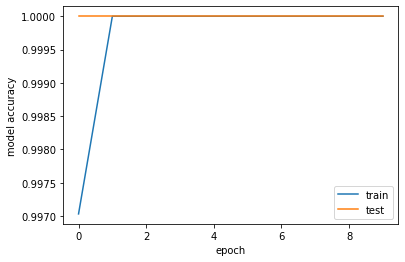

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

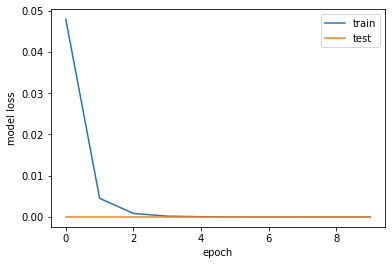

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()